# Decision Tree & Random Forest 

Sheny Lin・3/30/2023

### This assignment is to apply Random Forest to the BMD dataset and compare its accuracy to logistic regression and KNN.

# Write-up

### Decision Tree
1. Classification accuracy: 0.92 when max_depth=5; in addition, I applied 2 different tree values for classification (0.89 when max_depth=3; 0.97 when max_depth=7), the accuracy increased when adding up the tree value. 
2. Number of patients misclassified for each target: less than 9 patients misclassified as false negative or false positive
3. Its accuracy compared to logistic regression and KNN: The accuracy of decision tree is pretty outstanding. For logistic regression, it reached 0.85 classification accuracy, in this case, K-Nearest Neighbor performed worse with an accuracy of 0.79. 

### Random Forest
1. Classification accuracy: 0.982 when n_estimators=5; in addition, I applied 2 different estimator values for classification (0.96 when n_estimators=3;  0.988 when n_estimators=7). The accuracy was already outstanding with an estimator of 5 and the accuracy went up when increasing estimator.  
2. Number of patients misclassified for each target: less than 4 patients misclassified as false negative or false positive.
3. Its accuracy compared to logistic regression and KNN: The accuracy is even better than decision tree. The performance outshines decision tree, logistic regression and KNN. 

In [1]:
#import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


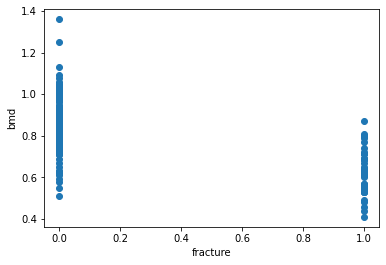

In [3]:
#Scatter Plot
plt.scatter(BMD['fracture'], BMD['bmd'])
plt.xlabel('fracture')
plt.ylabel('bmd')
plt.show()

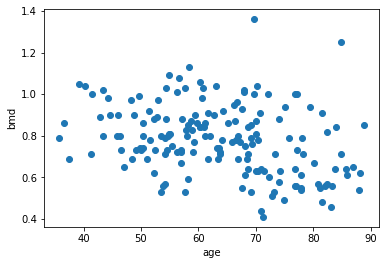

In [4]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['bmd'])
plt.xlabel('age')
plt.ylabel('bmd')
plt.show()

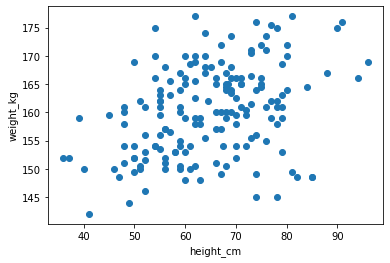

In [5]:
#Scatter Plot
plt.scatter(BMD['weight_kg'], BMD['height_cm'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.show()

In [6]:
BMD

,id,age,weight_kg,height_cm,bmd,fracture
0,469,57.05,64.0,155.5,0.88,0.0
1,8724,75.74,78.0,162.0,0.79,0.0
2,6736,70.78,73.0,170.5,0.91,0.0
3,24180,78.25,60.0,148.0,0.71,0.0
4,17072,54.19,55.0,161.0,0.79,0.0
...,...,...,...,...,...,...
164,21892,77.98,74.0,164.0,0.79,1.0
165,24140,50.29,59.0,161.0,0.80,1.0
166,6969,46.36,67.0,169.0,0.80,1.0
167,5505,54.79,70.0,166.0,0.81,1.0


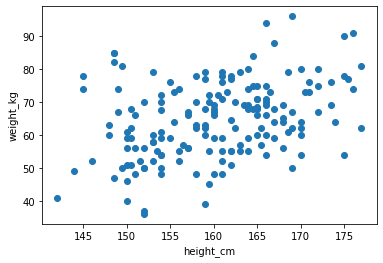

In [7]:
#Normalize X
#min_max_scaler = MinMaxScaler()
#[['age', 'weight_kg', 'height_cm']] = min_max_scaler.fit_transform(BMD[['age', 'weight_kg', 'height_cm']])

#Scatter Plot X
plt.scatter(BMD['height_cm'], BMD['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.show()

In [8]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

## Decision Tree


Accuracy:  0.893491124260355


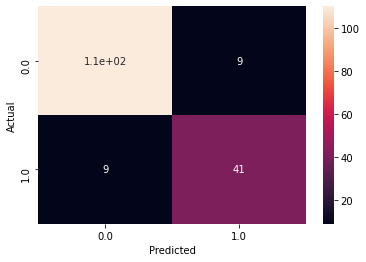

In [9]:
#Create classifier - DecisionTree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9289940828402367


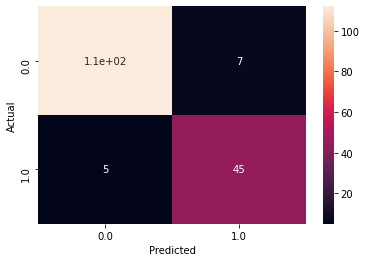

In [10]:
#Create classifier - DecisionTree
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9763313609467456


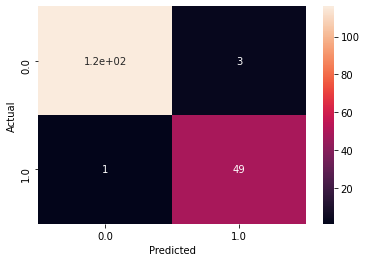

In [11]:
#Create classifier - DecisionTree
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 

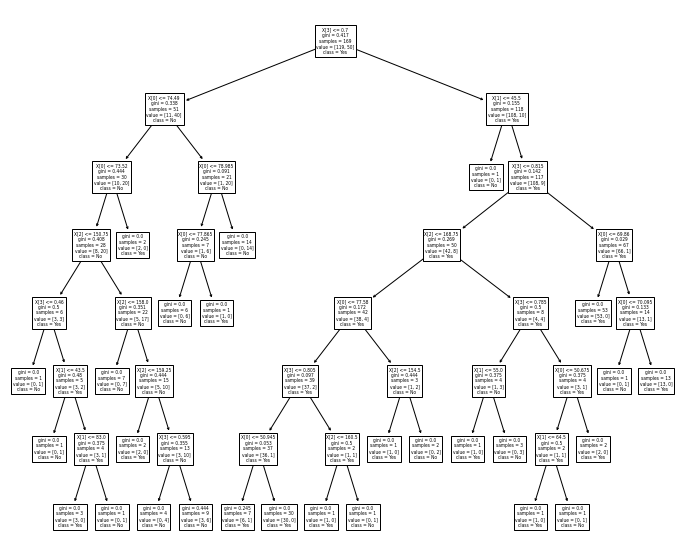

In [12]:
print (X)
print (Y_pred)

prediction = clf.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)

importances = list(clf.feature_importances_)
#Print out the feature and importances 
print (importances)

print(classification_report(Y, Y_pred))

fig = plt.figure(figsize=(12, 10))
tree.plot_tree(clf.fit(X,Y), class_names=['Yes', 'No'])
plt.show()

## Random Forest

Accuracy:  0.9349112426035503


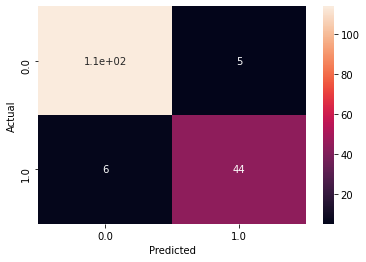

In [13]:
#Create classifier - RandomForest
clf = RandomForestClassifier(n_estimators=3)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9763313609467456


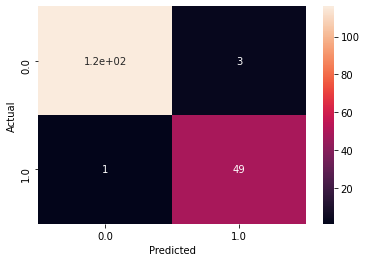

In [14]:
#Create classifier - RandomForest
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

Accuracy:  0.9822485207100592


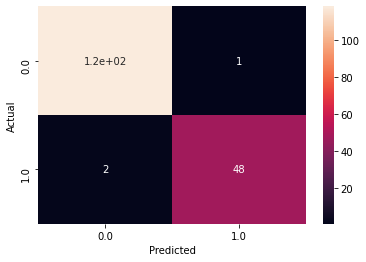

In [15]:
#Create classifier - RandomForest
clf = RandomForestClassifier(n_estimators=7)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

In [16]:
print (X)
print (Y_pred)

prediction = clf.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)

importances = list(clf.feature_importances_)
#Print out the feature and importances 
print (importances)

print(classification_report(Y, Y_pred))

fig = plt.figure(figsize=(12, 10))
#tree.plot_tree(clf.fit(X,Y), class_names=['Yes', 'No'])
plt.show()

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 

<Figure size 864x720 with 0 Axes>

## KNN
### Determine the optimal K - square root of N (method #1)

Accuracy:  0.7810650887573964


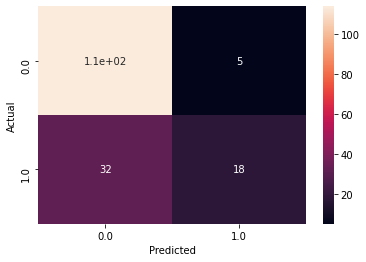

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

In [17]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

Accuracy:  0.7928994082840237


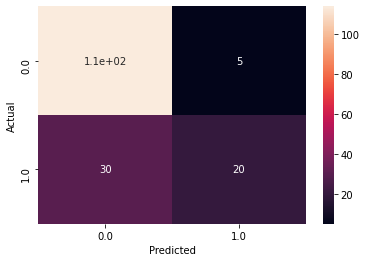

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

In [18]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

Accuracy:  0.7869822485207101


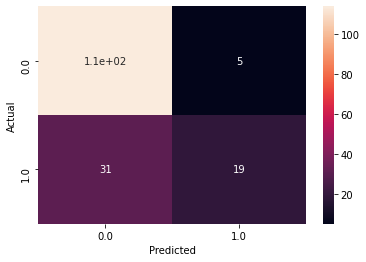

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

In [19]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

### Determine the optimal K - Calculate and plot error rate versus K values (method #2)

In [20]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

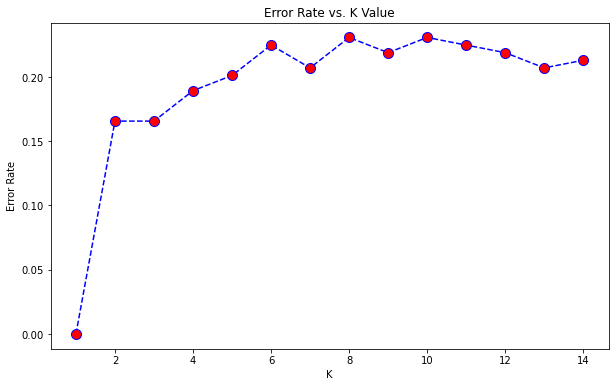

In [21]:
#Determine classifier error rate
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    #Y_pred=knn.predict(X)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy:  0.7928994082840237


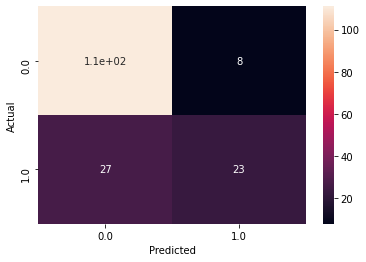

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

In [22]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[70.78, 73.0, 170.5, 0.91]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

## Logistic Regression

In [23]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#LogisticRegression_CrossValidation
from sklearn.model_selection import cross_val_score

#LogisticRegressionDS_TrainTest
from sklearn.model_selection import train_test_split

In [24]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


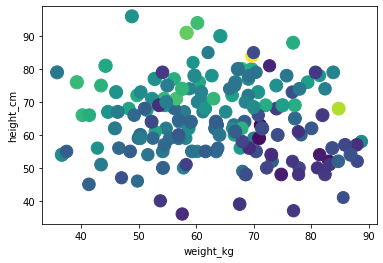

In [25]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['weight_kg'], BMD['height_cm'], BMD['bmd'])
plt.xlabel('weight_kg')
plt.ylabel('height_cm')
plt.show()

In [26]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

In [27]:
#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear') #L1: Lasso Regression

In [28]:
logistic_regression= LogisticRegression(penalty='l2', solver='liblinear') #L2: Ridge Regression

[-0.24065668] [[ 0.04675251 -0.06114481  0.01590842 -3.1252597 ]]
Accuracy:  0.8284023668639053


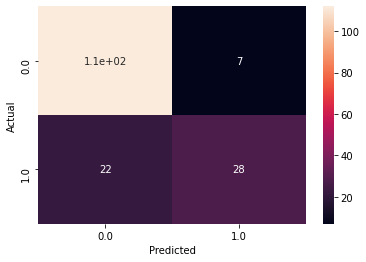

In [29]:
logistic_regression.fit(X,Y)
Y_pred=logistic_regression.predict(X)

print(logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

In [30]:
#print (X)
print (Y_pred)

print(classification_report(Y, Y_pred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.80      0.56      0.66        50

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169



Cross-Validation Accuracy [0.94117647 0.85294118 0.91176471 0.79411765 0.63636364]
Coefficients [-0.24065668] [[ 0.04675251 -0.06114481  0.01590842 -3.1252597 ]]
Accuracy:  0.8284023668639053


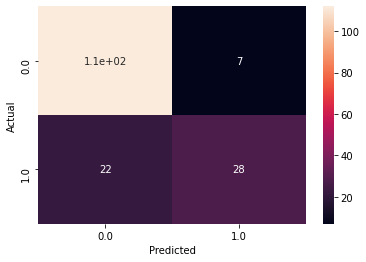

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.80      0.56      0.66        50

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169



In [31]:
#results = cross_val_score(logistic_regression, X, Y, cv=kfold)
results = cross_val_score(logistic_regression, X, Y, cv=5)
print('Cross-Validation Accuracy', results)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print(classification_report(Y, Y_pred))

Coefficients [0.] [[ 0.03592585 -0.02866742  0.0335161  -9.03851334]]
Accuracy:  0.8431372549019608


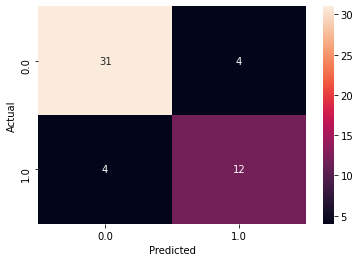

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        35
         1.0       0.75      0.75      0.75        16

    accuracy                           0.84        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.84      0.84      0.84        51



In [32]:
#Split Features and Target Variables into Train and Test Sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')
#logistic_regression= LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

#print (X_test)
#print (Y_pred)

print(classification_report(Y_test, Y_pred))

# Reference
1. "AdmissionLogisticRegression.py", "TshirtKNN_Error.py", "TshirtKNN.py" and "AdmissionDTRF.py" scripts created by Dr. Renee Hendricks
2. https://www.globaltechcouncil.org/machine-learning/logistic-regression-vs-k-nearest-neighbours-vs-support-vector-machine/
3. https://pubmed.ncbi.nlm.nih.gov/15025843/#:~:text=Although%20BMD%20may%20increase%20with,strength%20and%20fracture%20risk%20reduction.